本章节通过传统方式来创建Agent和AgentExecutor，Agent调用工具分为`function_call`模式和`ReAct`模式两种模式，下面结合具体案例来进行介绍。
> 需要说明的是，1.0.0版本的LangChain似乎不支持`AgentType.OPENAI_FUNCTIONS`来创建Agent了
# 1、单工具的使用
案例1：单工具使用
* 需求：今天北京的天气怎么样?
* 使用Tavily搜索工具
Tavily的搜索API是一个专门为人工智能Agent(或LLM)构建的搜索引擎，可以快速提供实时、准确和真实的结果。
* LangChain 中有一个内置工具，可以轻松使用 Tavily 搜索引擎 作为工具。
* TAVILY_API_KEY申请：https://tavily.com/ ，注册账号并登录，创建 API 密钥。
## 方式1：使用ReAct模式

In [1]:

import os

import dotenv
from langchain_classic.agents import initialize_agent, AgentType
from langchain_classic.tools import Tool
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI

dotenv.load_dotenv()

# 读取配置文件的信息
# os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")
os.environ['TAVILY_API_KEY'] = "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"

# 获取Tavily搜索工具的实例
search = TavilySearchResults(max_results=3)

# 获取一个搜索的工具
# 方式1：
# search_tool = StructuredTool.from_function(
#     func=search.run,
#     name="Search",
#     description="用于检索互联网上的信息",
# )

# 方式2：使用Tool（这一步骤也可以不要）
search_tool = Tool(
    func=search.run,
    name="Search",
    description="用于检索互联网上的信息",
)

# 获取大语言模型
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
)

# 获取Agent的实例
agent = AgentType.ZERO_SHOT_REACT_DESCRIPTION

# 获取AgentExecutor的实例
agent_executor = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent=agent,
    verbose=True,  # 显示详细的日志信息
)

# 通过AgentExecutor 调用invoke(),并得到响应
result = agent_executor.invoke("动漫《凡人修仙传》最新一集的剧情大致讲了什么？")

# 处理响应数据
print(result)

/var/folders/8w/wllcj7c553bggh1ngjg1m1500000gn/T/ipykernel_97905/258214899.py:16: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  search = TavilySearchResults(max_results=3)
/var/folders/8w/wllcj7c553bggh1ngjg1m1500000gn/T/ipykernel_97905/258214899.py:46: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the [LangGraph documentation](https://langchain-ai.github.io/langgraph/) as well as guides for [Migrating from Agent



> Entering new AgentExecutor chain...
我需要查找《凡人修仙传》的最新一集剧情，以便提供准确的信息。  
Action: Search  
Action Input: "动漫 凡人修仙传 最新一集 剧情"  
Observation: [{'title': '《凡人修仙傳》最新進度動畫懶人包：大陸國漫天花板的修仙之路', 'url': 'https://blog.myvideo.net.tw/mortal-cultivation-biography-animation/', 'content': '特色：3D 精緻畫面、忠實原著、戰鬥場景震撼\n\n首播：2020 年\n\n季數：目前第 4 季（2025 年更新中）\n\n平台：Bilibili、騰訊視頻、MyVideo線上看\n\n## 更新進度\n\n 第4季總集數：52集\n 每週一更新1集\n 目前已更新至第34集（2025年9月）MyVideo線上看\n\n## 《凡人修仙傳》劇情重要事件整理\n\n### 第1季：初入修仙世界\n\n 主線：\n  + 凡人韓立偶然踏入修仙世界，加入宗門，學習基礎功法與生存技巧。\n  + 適應修仙生活、掌握基本修煉方法。\n 支線：\n  + 宗門內鬥：師兄弟爭奪修煉資源，韓立學會隱忍與權衡利益。\n  + 初步法寶收集：探索宗門藏寶閣與秘境，獲得飛劍、護身符等基礎法寶。\n 世界觀 / 修仙設定：\n  + 宗門提供功法、修煉指導及日常任務。\n  + 基本修煉境界：練氣期 → 初步積累靈力、學習法術與內力控制。\n  + 靈力與法寶基礎知識：掌握基本法寶運用，積累戰鬥經驗。\n\n▎《凡人修仙傳》動畫 線上看>>MyVideo熱播中\n\n### 第2季：門派衝突與外敵威脅', 'score': 0.7906115}, {'title': '凡人修仙传_国创', 'url': 'https://www.bilibili.com/bangumi/play/ss28747', 'content': '番剧\n 直播\n 游戏中心\n 会员购\n 漫画\n 赛事\n\n38.3万\n\n28.2万\n\n13.7万\n\n凡人修仙传\n\n41.5亿播放  ·  1892.2万弹幕  ·  1225.7万追番\n\n小说改 / 玄

上述示例也可以写为：


In [3]:

from langchain_classic.agents import initialize_agent, AgentType
import os
import dotenv
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults

dotenv.load_dotenv()

# 读取配置文件的信息
os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")

# 获取Tavily搜索工具的实例
search = TavilySearchResults(max_results=3)

# 获取大语言模型
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
)

# 获取Agent的实例
agent = AgentType.ZERO_SHOT_REACT_DESCRIPTION

# 获取AgentExecutor的实例
agent_executor = initialize_agent(
    tools=[search],
    llm=llm,
    agent=agent,
    verbose=True,  # 显示详细的日志信息
)

# 通过AgentExecutor 调用invoke(),并得到响应
result = agent_executor.invoke("查询北京今天的天气情况")

# 处理响应数据
print(result)



> Entering new AgentExecutor chain...
我需要查找北京今天的天气情况。  
Action: tavily_search_results_json  
Action Input: "北京今天的天气"  
Observation: [{'title': '北京今天云量逐渐增多夜间有弱降水-资讯 - 中国天气网', 'url': 'http://news.weather.com.cn/2025/10/4381611.shtml', 'content': '大\n 中\n 小\n\n分享到\n\n原创未经授权不得转载\n\n中国天气网讯 北京今天（10月28日）白天晴转多云，最高气温15℃，夜间有零星小雨或小雨，最低气温6℃。明后天，北京以多云到阴为主，气温变化不大。\n\n昨天，北京天气晴朗，气温上升，南郊观象台最高气温为15.6°C，但早晚寒意明显，夜间最低气温1.6°C。\n\n今晨，北京天气以晴为主。（图/中国天气网 王晓）\n\n今天，北京天空云量逐渐增多，夜间有弱降水。北京市气象台预计，今天白天晴转多云，南部有轻雾，北转南风二三级，最高气温15℃；夜间多云转阴有零星小雨或小雨，南转北风一二级，最低气温6℃。\n\n明后天，北京以多云到阴为主，最高气温16°C，最低气温6至7°C。其中， 明天早晨和夜间有轻雾或雾。\n\n气象部门提醒，北京今天夜间有弱降水，明天早晨和夜间有雾，雨、雾天气能见度转差，路面湿滑，公众出行请留意交通安全。\n\n编辑：宋华成\n\n分享到\n\n查天气 关注 “中国天气网” 微信公众号、“中国天气”微博、“中国天气”抖音\n\n最新推荐\n\n查看更多\n\n高清图集', 'score': 0.9047265}, {'title': '中国气象局-天气预报- 北京', 'url': 'https://weather.cma.cn/web/weather/', 'content': '|  |  |  |  |  |  |  |  |  |\n ---  ---  ---  --- \n| 时间 | 11:00 | 14:00 | 17:00 | 20:00 | 23:00 | 02:00 | 05:00 | 08:00 |\n| 天气 |  |  |  |  |  |  |  |  |\n| 气温

## 使用FUNCTION_CALL模式
对于FUNCTION_CALL，旧版本的写法（AgentType.OPENAI_FUNCTIONS）跑不通，但示例代码我先保留下来作为参考。

推荐使用通用方式（create_openai_functions_agent）来创建function_call模式的Agent

In [8]:

from langchain_classic.agents import initialize_agent, AgentType
from langchain_classic.tools import Tool
from langchain_openai import ChatOpenAI
import os
import dotenv
from langchain_community.tools.tavily_search import TavilySearchResults

dotenv.load_dotenv()

# 读取配置文件的信息
os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")

# 获取Tavily搜索工具的实例
search = TavilySearchResults(max_results=3)

# 获取一个搜索的工具
# 方式1：
# search_tool = StructuredTool.from_function(
#     func=search.run,
#     name="Search",
#     description="用于检索互联网上的信息",
# )

# 方式2：使用Tool
search_tool = Tool(
    func=search.run,
    name="Search",
    description="用于检索互联网上的信息",
)

# 获取大语言模型
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
)

# 获取Agent的实例 (使用function_call模型)
agent = AgentType.OPENAI_FUNCTIONS

# 获取AgentExecutor的实例
agent_executor = initialize_agent(
    tools=[search_tool],
    llm=llm,
    agent=agent,
    verbose=True,  # 显示详细的日志信息
)

# 通过AgentExecutor 调用invoke(),并得到响应
result = agent_executor.invoke("查询北京今天的天气情况")

# 处理响应数据
print(result)



> Entering new AgentExecutor chain...


TypeError: langchain_core.language_models.chat_models.BaseChatModel.generate_prompt() got multiple values for keyword argument 'callbacks'

## react模式和function_call模式的对比
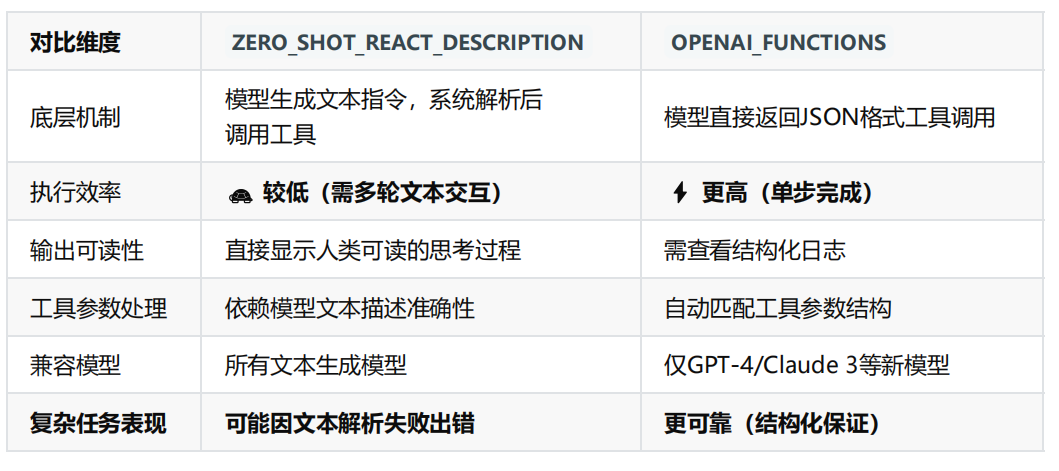

# 2、多工具的使用

需求：
- 计算特斯拉当前股价是多少？
- 比去年上涨了百分之几？（提示：调用PythonREPL实例的run方法）

## 2.1 使用ReAct模式

In [10]:
# 1.导入相关依赖
from langchain_openai import ChatOpenAI
from langchain_classic.agents import initialize_agent, AgentType
from langchain_classic.tools import Tool
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_experimental.utilities.python import PythonREPL

# 2. 设置 TAVILY_API 密钥
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

# 3.定义搜索工具
search = TavilySearchResults(max_results=3)

search_tool = Tool(
    name="Search",
    func=search.run,
    description="用于搜索互联网上的信息，特别是股票价格和新闻"
)

# 4.定义计算工具
python_repl = PythonREPL()  # LangChain封装的工具类可以进行数学计算

calc_tool = Tool(
    name="Calculator",
    func=python_repl.run,
    description="用于执行数学计算，例如计算百分比变化"
)

# 5. 定义LLM
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
)

# 6. 创建AgentExecutor执行器对象
agent_executor = initialize_agent(
    tools=[search_tool, calc_tool],
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# 7. 测试股票价格查询
query = "小米公司当前股价是多少？相较去年上涨了还是跌了？如果涨了，涨了多少？如果跌了，跌了多少？"
result = agent_executor.invoke(query)
print(f"查询结果: {result}")



> Entering new AgentExecutor chain...
我需要先查找小米公司的当前股价以及去年的股价，以便计算其涨跌情况。  
Action: Search  
Action Input: "小米公司当前股价"  
Observation: [{'title': '小米集团－W(1810)股票最新价格行情,实时走势图,股价分析预测', 'url': 'https://cn.investing.com/equities/xiaomi', 'content': ':   73.69M :   151.99M :   73.69M :   151.99M :   73.69M :   151.99M | 指标 | 1810 | 同业公司 **同业** - **1810**的同业公司相应指标平均值:1401, 002577, WTO, 600100, 002180 | 板块 **板块** - **科技** **板块**相关公司指标的平均值 | 比较 比较1810同业公司板块 | | 市盈率 | 29.5x | −2.9x | 11.7x |  | | 市净率 | 4.3x | 3.1x | 2.4x |  | 每股收益 / 预报 营收 / 预报 美元/人民币 | 小米集团－Ｗ | 47.44 | +3.22% | 73.69M | | 名称 | 最新价 | 看涨 | 公允价值 | | Aaaa Aaaaaaaaaa | 8.49 | +52.42% | 12.94 | | A A Aaaa | 23.78 | +50.62% |  | | 名称 | 最新价 | 看涨 | 公允价值 | | A A Aaaa | 23.78 | +50.62% | 35.82 |', 'score': 0.98521}, {'title': '小米集团-W(01810)股票价格_行情_走势图 - 东方财富', 'url': 'https://wap.eastmoney.com/quote/stock/116.01810.html', 'content': '今开 最高 最低 换手 总量 1.07亿 金额 49.76亿 总值 1.20万亿 市净 市盈 TTM 更多 相关港股（人民币计价）：42.300\xa0\xa0\xa0-1.12% * 分时 * 日K * 周K * 

## 2.2 使用FUNCTION_CALL模式


In [3]:
from langchain_classic.agents import AgentExecutor
from langchain_core.prompts import ChatPromptTemplate
import os, dotenv
# 1.导入相关依赖
from langchain_openai import ChatOpenAI
from langchain_classic.agents import create_openai_functions_agent
from langchain_classic.tools import Tool
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_experimental.utilities.python import PythonREPL


# 2. 设置 TAVILY_API 密钥
dotenv.load_dotenv()
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

# 3.定义搜索工具
search = TavilySearchResults(max_results=3)

search_tool = Tool(
    name="Search",
    func=search.run,
    description="用于搜索互联网上的信息，特别是股票价格和新闻"
)

# 4.定义计算工具
python_repl = PythonREPL()  # LangChain封装的工具类可以进行数学计算

calc_tool = Tool(
    name="Calculator",
    func=python_repl.run,
    description="用于执行数学计算，例如计算百分比变化"
)

# 5.定义提示词（create_openai_functions_agent方式下必须指定prompt）
prompt = ChatPromptTemplate.from_messages([
    ("system", "你是一个可以访问互联网信息的智能助手。"),
    ("human", "{input}"),
    ("system", "{agent_scratchpad}")
])

# 6.定义LLM
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
)

# 7.创建新版Agent（替代 initialize_agent）
agent = create_openai_functions_agent(
    tools=[search_tool, calc_tool],
    llm=llm,
    prompt=prompt
)

# 8.创建agent执行器
agent_executor = AgentExecutor(
    tools=[search_tool, calc_tool],
    agent=agent,
    verbose=True
)

# 9.测试股票价格查询
query = "小米公司当前股价是多少？相较去年上涨了还是跌了？如果涨了，涨了多少？如果跌了，跌了多少？"
result = agent_executor.invoke(input={"input": query})
print(f"查询结果: {result}")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26000\2036644046.py:17: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  search = TavilySearchResults(max_results=3)




> Entering new AgentExecutor chain...

Invoking: `Search` with `小米公司当前股价`


[{'title': '小米集團－W (1810.HK) 過往股價及數據 - Yahoo 財經', 'url': 'https://hk.finance.yahoo.com/quote/1810.HK/history/', 'content': '| 2025年7月2日 | 60.400 | 60.450 | 59.600 | 60.150 | 60.150 | 140,611,857 |\n| 2025年6月30日 | 59.500 | 60.000 | 57.500 | 59.950 | 59.950 | 260,498,936 |\n| 2025年6月27日 | 61.450 | 61.450 | 58.200 | 58.950 | 58.950 | 481,216,668 |\n| 2025年6月26日 | 57.150 | 57.200 | 56.050 | 56.900 | 56.900 | 126,954,433 |\n| 2025年6月25日 | 57.450 | 57.450 | 56.400 | 56.650 | 56.650 | 146,460,085 |\n| 2025年6月24日 | 55.200 | 57.200 | 55.150 | 56.900 | 56.900 | 222,470,141 | [...] | 2025年2月10日 | 42.700 | 43.950 | 42.150 | 43.750 | 43.750 | 178,623,301 |\n| 2025年2月7日 | 40.700 | 43.050 | 40.550 | 42.450 | 42.450 | 282,921,470 |\n| 2025年2月6日 | 39.800 | 40.700 | 39.400 | 40.550 | 40.550 | 174,418,873 |\n| 2025年2月5日 | 39.950 | 39.950 | 38.700 | 39.650 | 39.650 | 165,406,601 |\n| 2025年2月4日 | 38.700 | 40.100 | 38.500 | 39.550

# 3、自定义函数与工具

举例：计算3的平方，Agent自动调用工具完成

In [5]:
from langchain_classic.agents import initialize_agent, AgentType, Tool
from langchain_openai import ChatOpenAI


# 1. 定义工具 - 计算器（要求字符串输入）
def simple_calculator(expression: str) -> str:
    """
    基础数学计算工具，支持加减乘除和幂运算
    参数:
        expression: 数学表达式字符串，如 "3+5" 或 "2**3"
    返回:
        计算结果字符串或错误信息
    """
    print(f"\n[工具调用] 计算表达式: {expression}")

    print("只因为在人群中多看了你一眼，确认下你调用了我^_^")
    return str(eval(expression))


# 2. 创建工具对象
math_calculator_tool = Tool(
    name="Math_Calculator",  # 工具名称（Agent将根据名称选择工具）
    func=simple_calculator,  # 工具调用的函数
    description="用于数学计算，输入必须是纯数学表达式（如'3+5'或'3**2'表示平方）。不支持字母或特殊符号"  # 关键：明确输入格式要求
)

# 3. 初始化大模型
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
)

# 4. 初始化AgentExecutor（使用零样本React模式、增加超时设置）
agent_executor = initialize_agent(
    tools=[math_calculator_tool],  # 可用的工具列表
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # 简单指令模式
    verbose=True  # 关键参数！在控制台显示详细的推理过程
)

# 5. 测试工具调用（添加异常捕获）
print("=== 测试：正常工具调用 ===")
response = agent_executor.invoke("计算3的平方")  # 向Agent提问
print("最终答案:", response)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26000\1604845010.py:34: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the [LangGraph documentation](https://langchain-ai.github.io/langgraph/) as well as guides for [Migrating from AgentExecutor](https://python.langchain.com/docs/how_to/migrate_agent/) and LangGraph's [Pre-built ReAct agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/).
  agent_executor = initialize_agent(


=== 测试：正常工具调用 ===


> Entering new AgentExecutor chain...
我需要计算3的平方，即3乘以3。
Action: Math_Calculator
Action Input: 3**2
[工具调用] 计算表达式: 3**2
只因为在人群中多看了你一眼，确认下你调用了我^_^

Observation: 9
Thought:我现在知道最终答案
Final Answer: 9

> Finished chain.
最终答案: {'input': '计算3的平方', 'output': '9'}
